In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df=pd.read_csv('train_walmart.csv')
stores=pd.read_csv('stores.csv')
features=pd.read_csv('features.csv')

In [3]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [4]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [7]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [8]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [9]:
features.shape

(8190, 12)

In [10]:
features.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1,inplace=True)

In [11]:
features.fillna(method='ffill',axis=0,inplace=True)

In [12]:
features

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False
...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,193.589304,8.335,False
8186,45,2013-07-05,77.50,3.614,193.589304,8.335,False
8187,45,2013-07-12,79.37,3.614,193.589304,8.335,False
8188,45,2013-07-19,82.84,3.737,193.589304,8.335,False


In [13]:
df=train_df.merge(stores,how='inner',on='Store')

In [14]:
df=df.merge(features,how='inner',on=['Store','Date','IsHoliday'])

In [15]:
df['Date']=pd.to_datetime(df['Date'])

In [16]:
df['Week']=df.Date.dt.isocalendar().week

In [17]:
df['Year']=df.Date.dt.isocalendar().year

In [18]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'Year'],
      dtype='object')

In [19]:
df['Week'] = df['Week'].astype(float)

In [20]:
def scatter(columns):
    plt.figure()
    plt.scatter(df[columns],df['Weekly_Sales'])
    plt.xlabel('')
    plt.ylabel('Weekly_Sales')

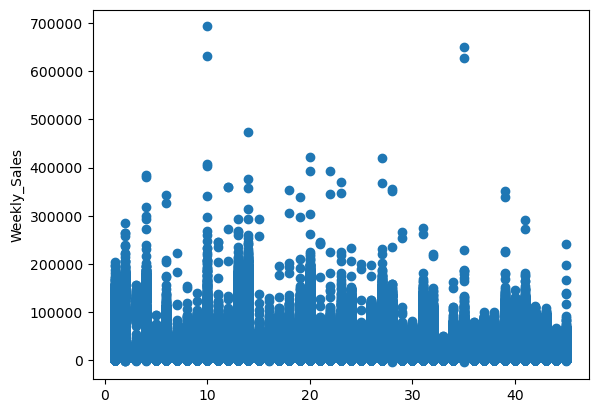

In [21]:
scatter('Store')

<Axes: xlabel='Week'>

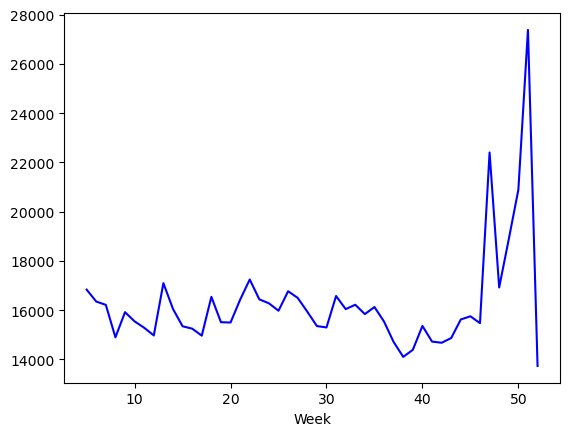

In [22]:
################ line charts for weekly sales each year

###### avg weekly sales for the year 2012

# sns.lineplot(df[df['Year']==2012].groupby(['Week'])['Weekly_Sales'].mean().index,df[df['Year']==2012].groupby(['Week'])['Weekly_Sales'].mean().values,color='red')

#or

x=df[df['Year']==2010].groupby(['Week'])['Weekly_Sales'].mean()
sns.lineplot(x=x.index,y=x.values,color='blue')


<Axes: xlabel='Week'>

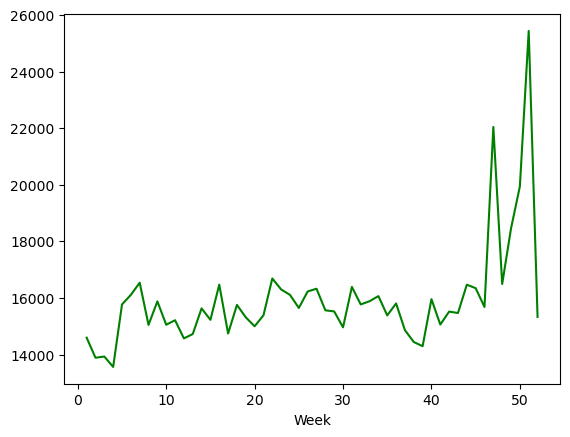

In [23]:
y=df[df['Year']==2011].groupby(['Week'])['Weekly_Sales'].mean()
sns.lineplot(x=y.index,y=y.values,color='green')

<Axes: xlabel='Week'>

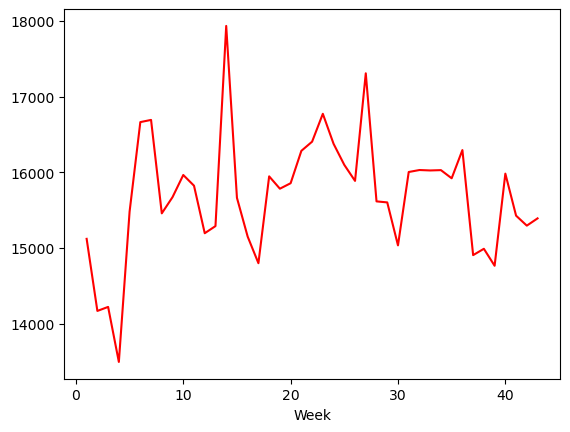

In [24]:
z=df[df['Year']==2012].groupby(['Week'])['Weekly_Sales'].mean()
sns.lineplot(x=z.index,y=z.values,color='red')

Text(0, 0.5, 'Sales')

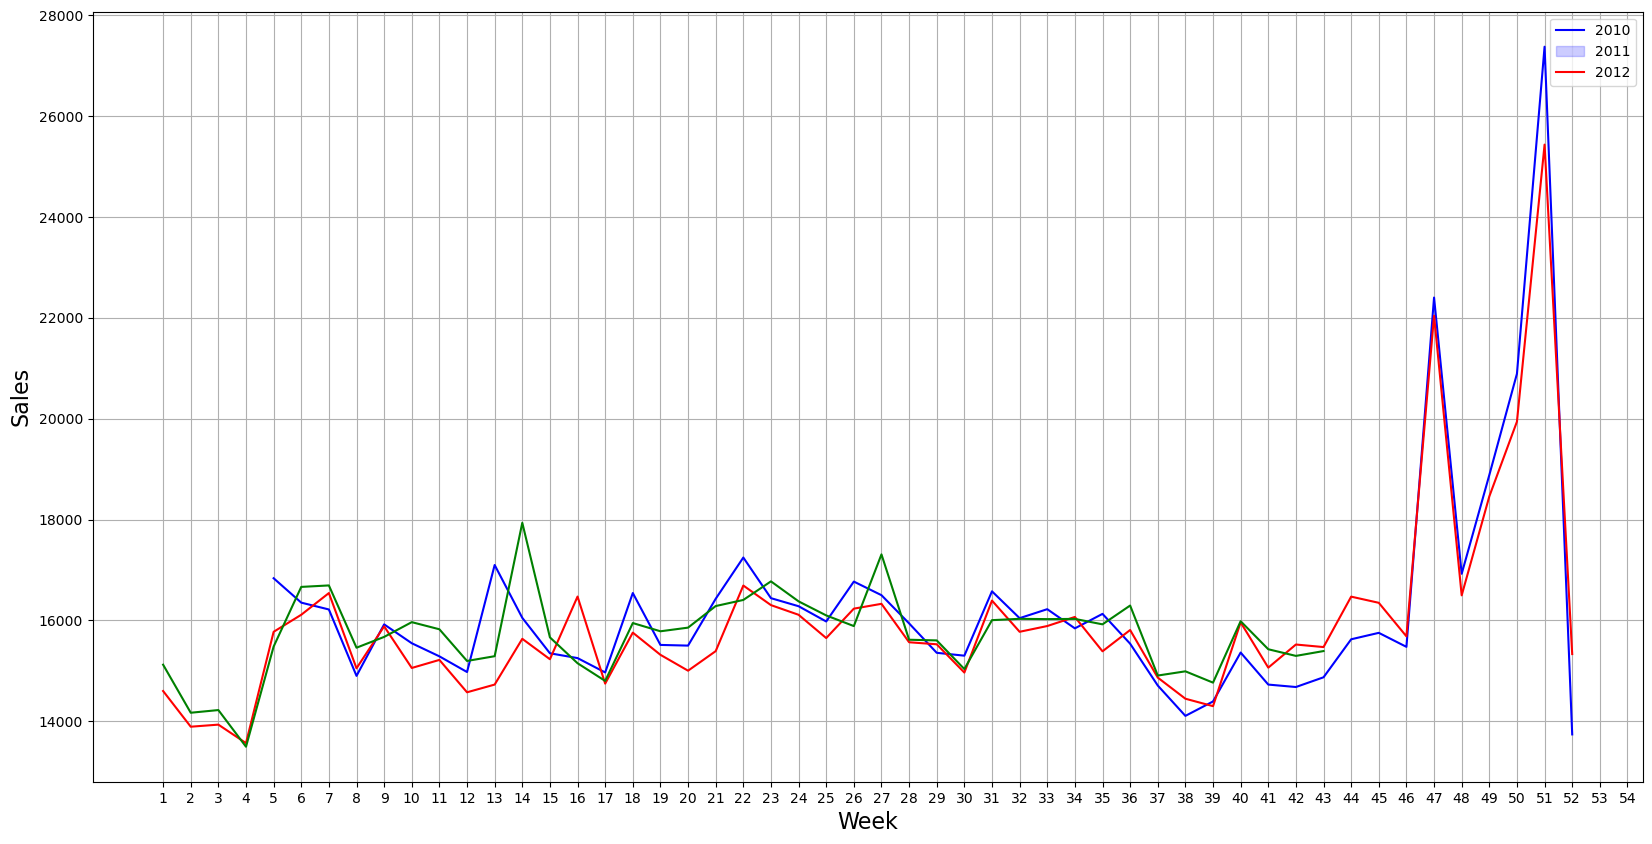

In [25]:
plt.figure(figsize=(20,10))
sns.lineplot(x=x.index,y=x.values,color='blue')
sns.lineplot(x=y.index,y=y.values,color='red')
sns.lineplot(x=z.index,y=z.values,color='green')
plt.legend(['2010','2011','2012'])
plt.grid()
plt.xticks(np.arange(1,55,1))
plt.xlabel('Week',fontsize=16)
plt.ylabel('Sales',fontsize=16)

C:\Users\nirmal kumaresan\AppData\Local\Temp\ipykernel_2996\1885698974.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Weekly_Sales'],color='green')


<Axes: ylabel='Density'>

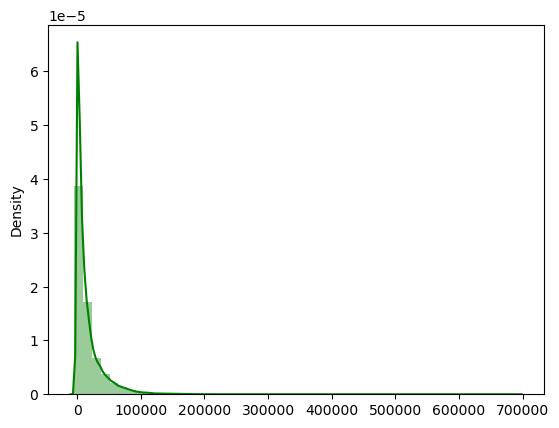

In [26]:
sns.distplot(x=df['Weekly_Sales'],color='green')

([<matplotlib.axis.XTick at 0x242f40929b0>,
 [Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31'),
  Text(31, 0, '32'),
  Text(32, 0, '33'),
  Text(33, 0, '34'),
  Text(34, 0, '35'),
  Text(35, 0, '36'),
  Text(36, 0, '37'),
  Text(37, 0, '38'),
  Text(38, 0, '39'),
  Text(39, 0, '40'),
  Text(40, 0, '41'),
  Text(41, 0, '42'),
  Text(42, 0, '43'),
  Text(43, 0, '44'),
  Text(44, 0, '45'),
  Text(45, 0, ''),
  Text(46, 0, '')])

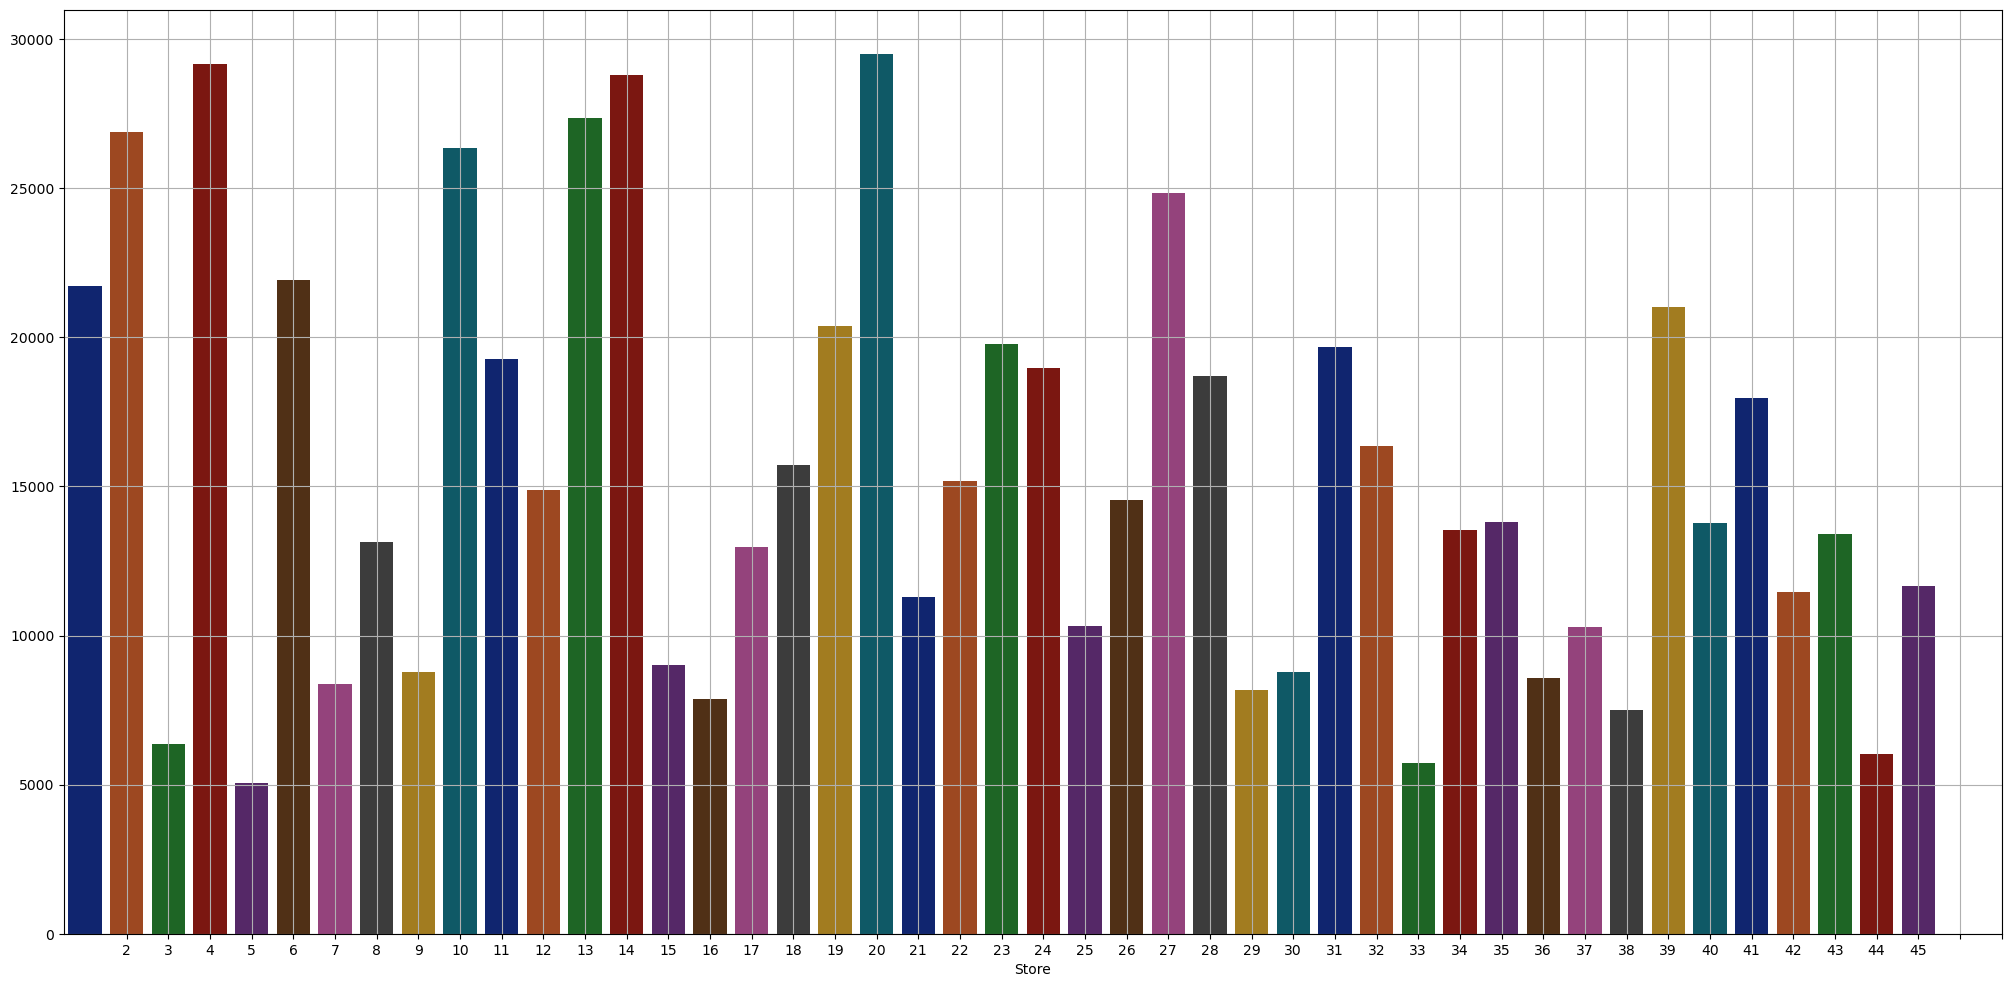

In [27]:
a=df.groupby(['Store'])['Weekly_Sales'].mean()
plt.figure(figsize=(25,12))
sns.barplot(x=a.index,y=a.values,palette='dark')
plt.grid()
plt.xticks(np.arange(1,47,step=1))

In [1]:
b=df.groupby(['Dept'])['Weekly_Sales'].mean()
plt.figure(figsize=(25,15))
sns.barplot(x=b.index,y=b.values,palette='dark')
plt.grid()
plt.xticks(np.arange(1,100,step=1))

NameError: name 'df' is not defined

In [29]:
Weekly_Store=df.groupby(['Store'])['Weekly_Sales'].mean().reset_index()

In [30]:
Weekly_Store=Weekly_Store.set_index('Store')

In [31]:
# Weekly_Sales
Weekly_Store.sort_values('Weekly_Sales').style.bar(align='left')

,Weekly_Sales
Store,
5,5053.415813
33,5728.414053
44,6038.929814
3,6373.033983
38,7492.478460
16,7863.224124
29,8158.810609
7,8358.766148
36,8584.412563


Text(0.5, 1.0, 'Weekly_Sales Analysize')

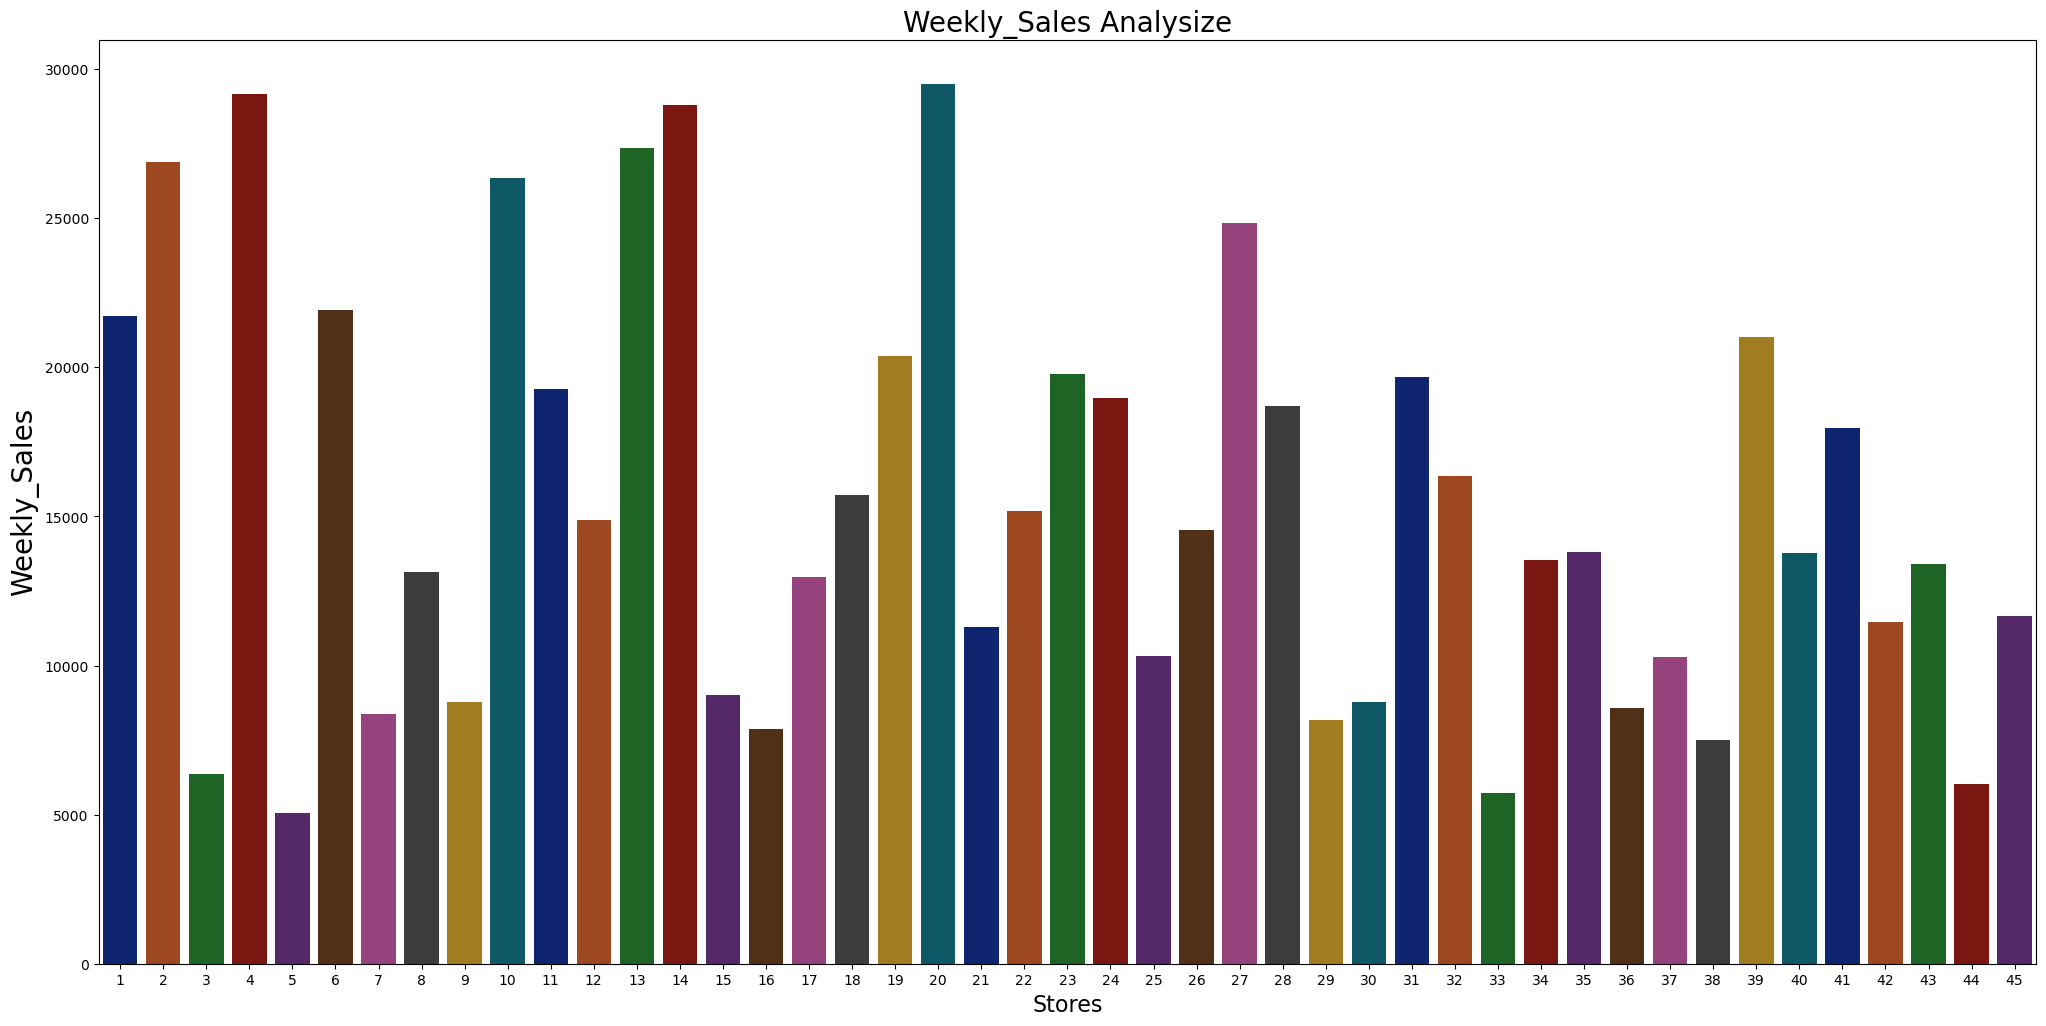

In [32]:
plt.figure(figsize=(25,12))
sns.barplot(x=Weekly_Store.index,y=Weekly_Store.values.reshape(-1,),palette='dark')
plt.xlabel('Stores',fontsize=16)
plt.ylabel('Weekly_Sales',fontsize=20)
plt.title('Weekly_Sales Analysize',fontsize=20)

In [33]:
week_dept=df['Weekly_Sales'].groupby(df['Dept']).mean()

In [34]:
week_dept=pd.DataFrame(week_dept)

In [38]:
week_dept.sort_values('Weekly_Sales').style_bar(aline='left')

AttributeError: 'DataFrame' object has no attribute 'style_bar'

C:\Users\nirmal kumaresan\AppData\Local\Temp\ipykernel_2996\739476818.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

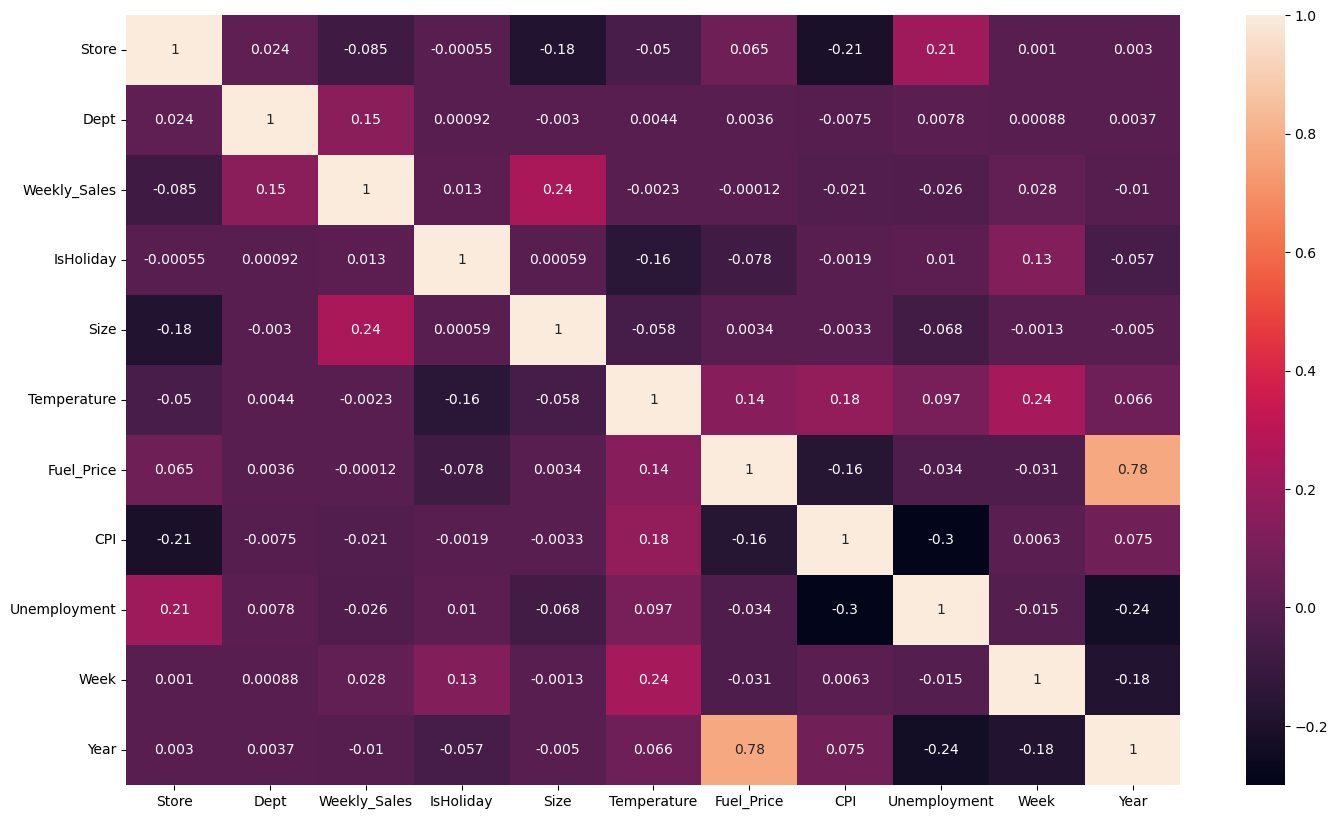

In [41]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Type', ylabel='Size'>

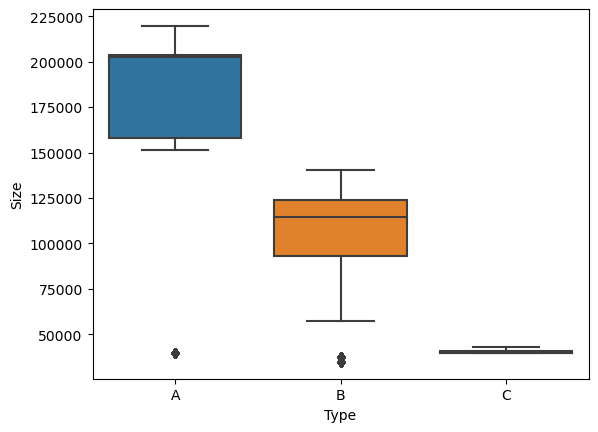

In [40]:
sns.boxplot(x='Type',y='Size',data=df)

In [36]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'Year'],
      dtype='object')